**Binary Classification - prediction Diabetes from patient Data Using scikit-learn**
- Build binary classification model using logistic Regression
- Dataset = pima indian diabetes datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



---

# 📘 **Line-by-Line Explanation**

---

## **1) Importing Libraries**

```python
import numpy as np
import matplotlib.pyplot as plt
```

* `numpy` → used for math operations (generating numbers, exponent, etc.)
* `matplotlib.pyplot` → used for plotting graphs

---

## **2) Defining the Sigmoid Function**

```python
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
```

* A **function** that takes input `z`
* Computes:

[
\sigma(z) = \frac{1}{1 + e^{-z}}
]

* Converts any real number → value between **0 and 1**
* Used in **logistic regression** and **neural networks**

---

## **3) Generate Values for z**

```python
z = np.linspace(-10, 10, 100)
```

* Creates **100 evenly spaced numbers** from **-10 to +10**
* This represents a typical "linear combination" in ML:

[
z = w^T x + b
]

* We feed these values into the sigmoid function to observe how output changes.

---

## **4) Compute the Sigmoid Output**

```python
probability = sigmoid(z)
```

* Applies the sigmoid function to every value in `z`
* `probability` will be an array of 100 values between **0 and 1**

---

## **5) Create a Plot Figure**

```python
plt.figure(figsize=(10, 8))
```

* Sets the size (width=10 inches, height=8 inches)
* Helpful for big, clear graphs

---

## **6) Plot the Sigmoid Curve**

```python
plt.plot(z, probability, label='Sigmoid Curve')
```

* X-axis: values of `z`
* Y-axis: output of sigmoid for each z
* Draws a smooth S-shaped curve

---

## **7) Add helpful reference lines**

```python
plt.axhline(0.5, linestyle='--', color='red', label='y = 0.5')
```

* A dotted horizontal line at 0.5
* Important because sigmoid(z) = 0.5 when z = 0
* Logistic regression decision boundary

---

```python
plt.axhline(0, linestyle='--', color='gray', label='y = 0')
```

* Shows lower limit of sigmoid

---

```python
plt.axhline(1, linestyle='--', color='gray', label='y = 1')
```

* Shows upper limit of sigmoid function

---

## **8) Label X and Y axis**

```python
plt.xlabel('Linear Combination (z)')
plt.ylabel('Probability p(y = 1)')
```

* Helps readers understand what z and probability mean
* In logistic regression:

  * z = wᵀx + b
  * output = probability that class is 1

---

## **9) Add grid lines**

```python
plt.grid(True)
```

* Helps visually align points with the axes

---

## **10) Add a legend**

```python
plt.legend()
```

* Displays labels for the curve and reference lines

---

## **11) Show the plot**

```python
plt.show()
```

* Renders the final graph on the screen

---

# 🎯 **What This Graph Shows (Simple Explanation)**

* When **z is negative**, sigmoid output → near **0**
* When **z is 0**, sigmoid output = **0.5**
* When **z is positive**, sigmoid output → near **1**

This is why sigmoid is used for **binary classification probability**.

---



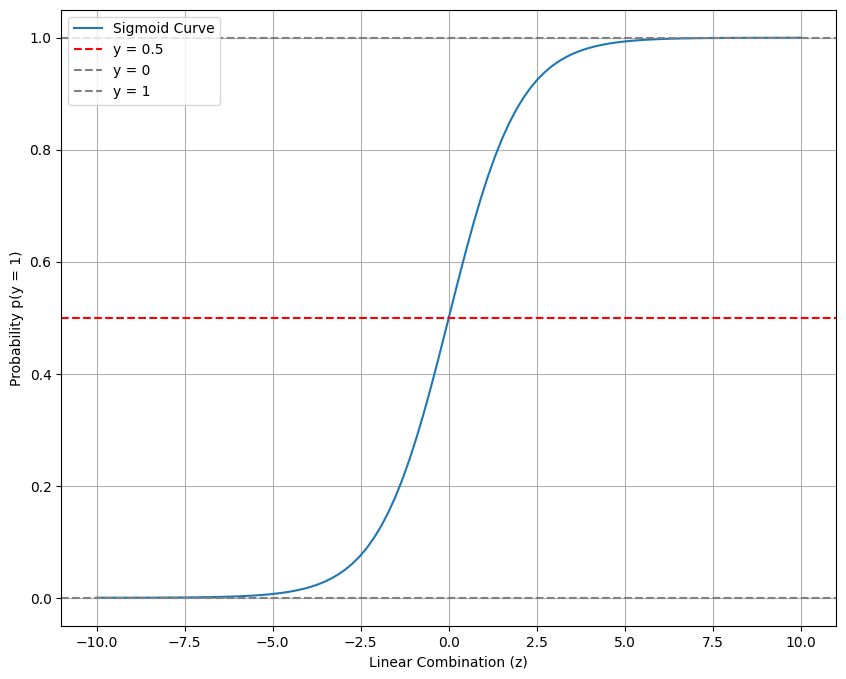

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate 100 values between -10 and 10
z = np.linspace(-10, 10, 100)

# Compute sigmoid probability for each z value
probability = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(10, 8))
plt.plot(z, probability, label='Sigmoid Curve')

# Add horizontal reference lines
plt.axhline(0.5, linestyle='--', color='red', label='y = 0.5')
plt.axhline(0, linestyle='--', color='gray', label='y = 0')
plt.axhline(1, linestyle='--', color='gray', label='y = 1')

# Axis labels
plt.xlabel('Linear Combination (z)')
plt.ylabel('Probability p(y = 1)')

# Add grid + legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [4]:

# URL of the Pima Indians Diabetes Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Column names according to the dataset description
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"
]

# Download + Load dataset into DataFrame
df_diabetes = pd.read_csv(url, header=None, names=column_names)

print("Dataset downloaded and loaded successfully!")
print(df_diabetes.head())


Dataset downloaded and loaded successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  


/tmp/ipython-input-1634316843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df_diabetes, palette=['skyblue','salmon'])


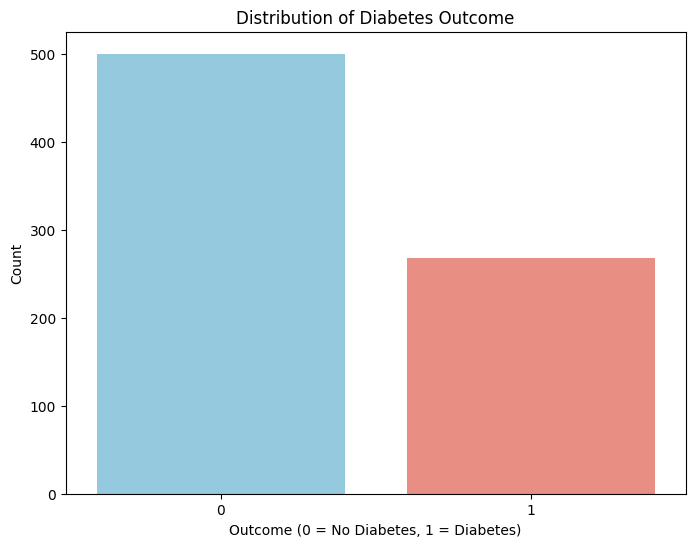

In [5]:
# visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df_diabetes, palette=['skyblue','salmon'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


---

# 📝 **Line-by-Line Explanation (Very Simple)**

---

## **1. Import ML tools**

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
```

* `train_test_split` → splits data into training & testing parts.
* `LogisticRegression` → machine-learning model for binary classification.

---

## **2. Separate features (X) and target (y)**

```python
X = df_diabetes.drop('Outcome', axis=1)
```

* Takes the full dataset.
* Removes the `Outcome` column.
* Remaining columns become **features (X)** used to predict diabetes.

```python
y = df_diabetes['Outcome']
```

* Extracts the target column **Outcome** (0 = no diabetes, 1 = diabetes).

---

## **3. Split the data**

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
```

Let’s break it down:

### **`test_size=0.30`**

* 30% of data → testing
* 70% → training

### **`random_state=42`**

* Ensures you get the *same split every time*.

### **`stratify=y`**

* Ensures both train and test have the **same proportion of diabetic vs non-diabetic cases**.
* Very important for balanced evaluation.

---

## **4. Create Logistic Regression model**

```python
model = LogisticRegression(
    solver='liblinear',
    random_state=42
)
```

### Explanation:

* Logistic regression needs a "solver" (optimization algorithm).
* `'liblinear'` works best for **small datasets** like Pima Diabetes.
* `random_state=42` makes results reproducible.

---

## **5. Train the model**

```python
model.fit(X_train, y_train)
```

* Feeds the training data to the model.
* The model learns the relationship between input features and the diabetes outcome.

---

## **6. Make predictions**

```python
y_pred_logistic = model.predict(X_test)
```

* Uses the trained model to predict outcomes for the test data.
* Output is an array of 0s and 1s (no diabetes / diabetes).

---

# 🎉 Done!

You now have:

* **Features + Target split**
* **Train/test split**
* **Logistic Regression model**
* **Predictions**

---
"**.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Separate features (X) and target (y)
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 3. Create logistic regression model
model = LogisticRegression(
    solver='liblinear',
    random_state=42
)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on test data
y_pred_logistic = model.predict(X_test)


**Evaluate the model**


---

# 📝 **Line-by-Line Explanation**

---

## **Import required metrics and libraries**

```python
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
```

* `accuracy_score` → calculates how many predictions were correct.
* `confusion_matrix` → shows correct & incorrect predictions in matrix form.
* `matplotlib` + `seaborn` → used for plotting.

---

## **1. Calculate accuracy of the model**

```python
accuracy = accuracy_score(y_test, y_pred_logistic)
```

* Compares actual labels (`y_test`) with predicted labels (`y_pred_logistic`).
* Returns accuracy between **0 and 1**.

```python
print(f"Accuracy: {accuracy:.2f}")
```

* Prints accuracy up to **2 decimal places**.

---

## **2. Build confusion matrix**

```python
cm = confusion_matrix(y_test, y_pred_logistic)
```

`cm` becomes a 2×2 matrix:

|              | Predicted 0 | Predicted 1 |
| ------------ | ----------- | ----------- |
| **Actual 0** | TN          | FP          |
| **Actual 1** | FN          | TP          |

Shows how many predictions were correct or wrong.

---

## **3. Plot confusion matrix heatmap**

```python
plt.figure(figsize=(8, 6))
```

* Sets plot size.

```python
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False
)
```

### Explanation of parameters:

* `cm` → confusion matrix data.
* `annot=True` → show numbers inside squares.
* `fmt='d'` → numbers are integers.
* `cmap='Blues'` → blue color theme.
* `cbar=False` → removes color scale bar.

---

## **4. Add labels and title**

```python
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
```

* Makes the plot easy to read.

---

## **5. Set custom tick labels**

```python
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'], rotation=0)
```

* Centers tick labels on squares.
* Removes angled text for readability.

---

## **6. Show the final plot**

```python
plt.show()
```

* Displays the confusion matrix.

---



Accuracy: 0.74


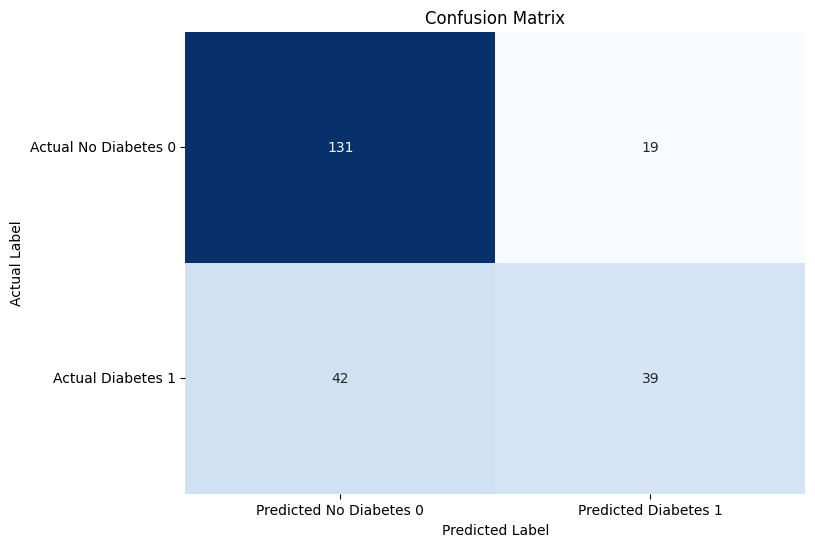

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy:.2f}")

# 2. Create confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# 3. Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,          # show numbers inside cells
    fmt='d',             # integer format
    cmap='Blues',        # color theme
    cbar=False           # remove color bar
)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

plt.xticks([0.5, 1.5], ['Predicted No Diabetes 0', 'Predicted Diabetes 1'])
plt.yticks([0.5, 1.5], ['Actual No Diabetes 0', 'Actual Diabetes 1'], rotation=0)

plt.show()


**Classification Report**

In [18]:
print('Classification Report:')
print(classification_report(y_test, y_pred_logistic))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.48      0.56        81

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231




---

# ✅ **What is a Classification Report?**

It summarizes the performance of your model using:

* **Precision**
* **Recall**
* **F1-score**
* **Support (number of samples)**

It is especially useful for **imbalanced datasets** like diabetes prediction.

---

# 📌 **Explanation of the Report**

```
              precision    recall  f1-score   support
```

These are the evaluation metrics for each class.

---

# 🔵 **Class 0 (No Diabetes)**

```
0       0.76      0.87      0.81       150
```

### **1. Precision (0.76)**

* When the model predicted **0**,
  **76%** of the time it was correct.

### **2. Recall (0.87)**

* Out of all real **0** cases (actual No Diabetes),
  the model correctly identified **87%** of them.

### **3. F1-score (0.81)**

* Balance between precision & recall.
* The model is performing quite well for class 0.

### **4. Support (150)**

* There were **150 actual samples** labeled 0.

---

# 🔴 **Class 1 (Diabetes)**

```
1       0.67      0.48      0.56        81
```

### **1. Precision (0.67)**

* When the model predicted **1**,
  **67%** of the time it was correct.

### **2. Recall (0.48)**

* Out of all real diabetes cases,
  only **48%** were correctly detected.

👉 This means **it is missing many diabetes cases** (false negatives).

### **3. F1-score (0.56)**

* Moderate performance, not very strong.

### **4. Support (81)**

* There were **81 actual diabetes cases**.

---

# 🔶 **Overall Metrics**

```
accuracy                           0.74       231
```

### **Accuracy (0.74)**

* 74% of all predictions were correct.
* Out of 231 samples, the model predicted 171 correctly.

---

# 🔷 **Macro Average**

```
macro avg       0.71      0.68      0.69       231
```

### **Macro Average**

* It calculates the **average of each metric without weighting by class size**.
* Treats both classes equally (0 and 1).
* Good for seeing performance on **minority classes**.

---

# 🔶 **Weighted Average**

```
weighted avg    0.73      0.74      0.72       231
```

### **Weighted Average**

* Average weighted by how many samples each class has.
* Since Class 0 has more samples, its performance affects this more.
* Good for **overall model evaluation**.

---

# 🧠 **Quick Summary (Easy to Remember)**

* **Class 0 (No Diabetes):** Model performs well
  ✔ High recall (87%)
  ✔ Good precision (76%)

* **Class 1 (Diabetes):** Model struggles
  ❌ Low recall (48%) → misses many diabetes cases
  ❌ Lower F1 compared to class 0

* **Accuracy 74%:** Acceptable but not great.

* **Macro avg:** Shows imbalance issue.

* **Weighted avg:** Shows overall performance.

---


**Make Prediction On New Patients**


# 🧾 Line-by-line explanation

1. `import pandas as pd`

   * Import pandas to build a one-row DataFrame representing the new patient.

2. `new_patient = pd.DataFrame({...})`

   * Creates a DataFrame with one row. Each dictionary key must match the **feature/column names** your model expects. Each value is wrapped in a list because pandas expects sequence-like values per column.

3. `# new_patient = pd.DataFrame(scaler.transform(new_patient), ...)` (optional)

   * **If** you applied scaling or encoding (e.g., `StandardScaler`, `MinMaxScaler`, one-hot encoding) to your training data, you **must** apply the exact same transformer (fitted on training data) to this `new_patient` before predicting. Uncomment and replace `scaler` with your fitted transformer.

4. `prediction = model.predict(new_patient)`

   * Runs the model to output the predicted **class label** (0 or 1). The result is an array like `[0]` or `[1]`.

5. `probability = model.predict_proba(new_patient)[:, 1]`

   * `predict_proba()` returns probabilities for each class, shape `(n_samples, n_classes)` (e.g., `[[p0, p1]]`). `[:, 1]` picks the probability of class `1` (having diabetes). The result is an array like `[0.73]`.

6. `if prediction[0] == 1: ... else: ...`

   * Check the predicted class and print a readable message.
   * `probability[0]:.2f` formats the probability as a decimal with **two** digits after the point (e.g., `0.73`).

---

# ⚠️ Important notes / gotchas

* **Feature names & order**: The DataFrame column names must exactly match the features used to train the model. If they differ, you will get an error or wrong predictions.
* **Preprocessing**: If you scaled (`scaler.fit(X_train)`) or encoded features before training, **apply the same fitted transformer** to `new_patient` (do not fit again). Otherwise probabilities/predictions will be meaningless.
* **Missing features**: If your model used different features (e.g., column name was `DiabetesPedigree` instead of `DiabetesPedigreeFunction`), adjust the keys to match exactly.
* **Probability interpretation**: The printed probability is `P(y=1 | x)` — the model’s estimated probability the patient has diabetes. You can set a custom decision threshold (not just 0.5) depending on recall/precision trade-offs.

---

If you want, I can:

* adapt this to automatically use `X.columns` to construct the new DataFrame in the correct order,
* add scaling using your saved `scaler`, or
* show a short UI to input patient values interactively. Which would you like?


In [21]:
import pandas as pd

# 1) Create a single-row DataFrame for a new patient
new_patient = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [130],
    'BloodPressure': [80],
    'SkinThickness': [30],
    'Insulin': [0],
    'BMI': [35.6],
    'DiabetesPedigree': [0.65],
    'Age': [40]
})

# 2) If you scaled/encoded training features, apply the same transformer here:
# new_patient = pd.DataFrame(scaler.transform(new_patient), columns=new_patient.columns)

# 3) Predict class (0 or 1) and probability of class 1 (having diabetes)
prediction = model.predict(new_patient)                 # predicted class label (array shape (1,))
probability = model.predict_proba(new_patient)[:, 1]    # probability of class '1' (array shape (1,))

# 4) Print a human-friendly result (showing the probability)
if prediction[0] == 1:
    print(f"The model predicts that this patient HAS diabetes (probability = {probability[0]:.2f})")
else:
    print(f"The model predicts that this patient DOES NOT have diabetes (probability = {probability[0]:.2f})")


The model predicts that this patient DOES NOT have diabetes (probability = 0.46)
